## Lectures 9: Graph Traversal and Topological Sort

### Defintions
### Graph Representation
- Graph is a data structure G = (V, E).
- Graph can be either directed or undirected


### Adjacency List Representation

In [ ]:
# Adjacency list representation

# Undirected Graph
graph_1_vertices = set(list(range(8)))    # Casting the list to be a set
graph_1_edges = {
    0: [1, 4],
    1: [0, 5],
    2: [5, 6],
    3: [7],
    4: [0],
    5: [1, 2, 6],
    6: [2, 5, 7],
    7: [3, 6]
}


# Directed Graph
graph_2_vertices = set(list(range(6)))
graph_2_edges = {
    0: [1, 3],
    1: [4],
    2: [4, 5],
    3: [1],
    4: [3],
    5: [5],
}

In [ ]:
from graphviz import Digraph, Graph

def draw_graph(vertices, edges, directed):
  if directed:
    dot = Digraph(format="svg")
  else:
    dot = Graph(format="svg")
  for v in vertices:
    dot.node(name=str(v), label=f"{v}")
  if not directed:
    already_drawn = set()
  for k, v in edges.items():
    for curr_v in v:
      if directed:
        dot.edge(str(k), str(curr_v))
      else:
        sorted_edge = tuple(sorted([k, curr_v]))
        if sorted_edge not in already_drawn:
          already_drawn.add(sorted_edge)
          dot.edge(str(k), str(curr_v))
  return dot

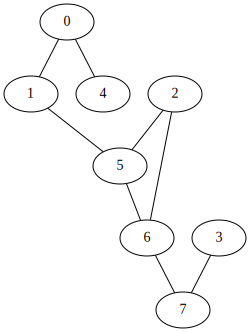

In [ ]:
draw_graph(graph_1_vertices, graph_1_edges, directed=False)

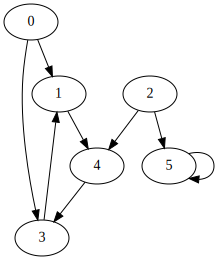

In [ ]:
draw_graph(graph_2_vertices, graph_2_edges, directed=True)

## Graph Traversal
### It is an algorithm (program) that is given:
 - A Graph: G and
 - A distinguished source vertex: s.

 The program **`Systematically`** follow the edges of the graph so as to visit the vertices.
 Today, we are exploring:
 - Breadth First Traversal: This systematically visits every node/vertex v in the graph reachable from s, while identifying the shortest path from s to v.
 - Depth First Traversal: This systematically visits every vertex v in the graph reachable from s following the strategy:
  1. explores edges out of the most recently discovered vertex v
  2. Once all of the edges of v have been explored, the search backtracks to explore other edges leaving the vertex from which v was discovered.
 - Topological Sort: Specific only to DAGs (Directed acyclic Graphs), it visits all nodes reachable form s, so as to return a linear sorting of all its verices, such that if G contains an edge from u and v, then u appears before v in this ordering.

## Breadth First Search

In [ ]:
from collections import deque

# Setting The graph's nodes & edges
graph_verices = graph_1_vertices
graph_edges = graph_1_edges

# Setting The source vertex
s = 1

# Creating The queue
q = deque() # An element which can be efficiently used for implementing a queue or a stack
visited = set()

# Initialization
q.append(s)
visited.add(s)

while len(q) > 0:
  # pop the queue
  curr_vertex = q.popleft()
  # visit Nodes
  print(f"visiting: {curr_vertex}")
  for neighbor in graph_edges[curr_vertex]:
    #print(neighbor)
    # check if we visited the node previously
    if neighbor not in visited:
      # append to the queue
      q.append(neighbor)
      # make sure we don't revisit
      visited.add(neighbor)

visiting: 1
visiting: 0
visiting: 5
visiting: 4
visiting: 2
visiting: 6
visiting: 7
visiting: 3


In [ ]:
# from collections import deque

# # Setting The graph's nodes & edges
# graph_verices = graph_2_vertices
# graph_edges = graph_2_edges

# # Setting The source vertex
# s = 0

# # Creating The queue
# q = deque() # An element which can be efficiently used for implementing a queue or a stack
# visited = set()

# for s, val in graph_2_edges.items():
#   if s not in visited:
#     # Initialization
#     q.append(s)
#     visited.add(s)
#     while len(q) > 0:
#       # pop the queue
#       curr_vertex = q.popleft()

#       # visit Nodes
#       print(f"visiting: {curr_vertex}")
#       for neighbor in graph_edges[curr_vertex]:
#         #print(neighbor)
#         # check if we visited the node previously
#         if neighbor not in visited:
#           # append to the queue
#           q.append(neighbor)
#           # make sure we don't revisit
#           visited.add(neighbor)

### Topological Sort == DFS except it includes directed acyclic graphs

In [ ]:
# Since it is a cyclic graph it won't print the whole nodes
# Setting The graph's nodes & edges
graph_verices = graph_2_vertices
graph_edges = graph_2_edges

# Setting The source vertex
s = 0

# Creating The queue
visited = set()

def dfs(v):
  # bse base: node was previously visited
  if v in visited:
    return
  else:
    # add to visited to
    visited.add(v)
    # visit v
    print (f"Visit Node before neighbors: {v}")
    for neighbor in graph_edges[v]:
      dfs(neighbor)

dfs(s)

Visit Node before neighbors: 0
Visit Node before neighbors: 1
Visit Node before neighbors: 4
Visit Node before neighbors: 3


#### In case you want all nodes included in the result

In [ ]:
# Since it is a cyclic graph it won't print the whole nodes
# Setting The graph's nodes & edges
graph_verices = graph_2_vertices
graph_edges = graph_2_edges
# Creating The queue
visited = set()
def dfs(v):
  # bse base: node was previously visited
  if v in visited:
    return
  else:
    # add to visited to
    visited.add(v)
    # visit v
    print (f"visit before neighbors: {v}")
    for neighbor in graph_edges[v]:
      # A recursive call
      dfs(neighbor)

# There is no source vertex here but instead
for node in graph_verices:
  if node not in visited:
    print('New DFS Search: ')
    dfs(node)

dfs(s)

New DFS Search: 
visit before neighbors: 0
visit before neighbors: 1
visit before neighbors: 4
visit before neighbors: 3
New DFS Search: 
visit before neighbors: 2
visit before neighbors: 5


### Depth First Search

In [ ]:
# Setting The graph's nodes & edges
graph_verices = graph_1_vertices
graph_edges = graph_1_edges

# Setting The source vertex
s = 1

# Creating The queue
visited = set()

def before_dfs(v):
  # bse base: node was previously visited
  if v in visited:
    return
  else:
    # add to visited to
    visited.add(v)
    # visit v
    print (f"visit before neighbors: {v}")
    for neighbor in graph_edges[v]:
      before_dfs(neighbor)

before_dfs(s)

visit before neighbors: 1
visit before neighbors: 0
visit before neighbors: 4
visit before neighbors: 5
visit before neighbors: 2
visit before neighbors: 6
visit before neighbors: 7
visit before neighbors: 3


In [ ]:
# Setting The graph's nodes & edges
graph_verices = graph_1_vertices
graph_edges = graph_1_edges

# Setting The source vertex
s = 1

# Creating The queue
visited = set()

def after_dfs(v):
  # bse base: node was previously visited
  if v in visited:
    return
  else:
    # add to visited to
    visited.add(v)
    for neighbor in graph_edges[v]:
      after_dfs(neighbor)
    # visit v
    print (f"visit after neighbors: {v}")


after_dfs(s)

visit after neighbors: 4
visit after neighbors: 0
visit after neighbors: 3
visit after neighbors: 7
visit after neighbors: 6
visit after neighbors: 2
visit after neighbors: 5
visit after neighbors: 1
